<a href="https://colab.research.google.com/github/POOJASREE-B/convolutional-denoising-autoencoder/blob/main/dl_ex_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
print("""Name : POOJASREE B
Register Number : 212223040148
Department : CSE""")

Name : POOJASREE B
Register Number : 212223040148
Department : CSE


In [18]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
(x_train, _), (x_test, _) = mnist.load_data()

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28, 1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28, 1))

In [23]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape)
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape)


In [24]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

POOJASREE B
212223040148


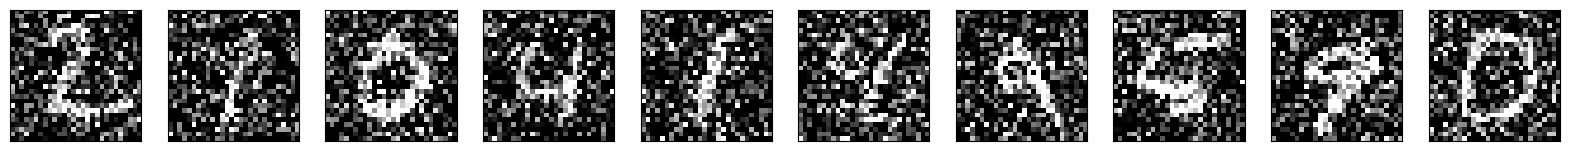

In [25]:
print("POOJASREE B\n212223040148")
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [26]:
input_img = keras.Input(shape=(28, 28, 1))

In [27]:
x=layers.Conv2D(16,(5,5),activation='relu',padding='same')(input_img)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(4,(3,3),activation='relu',padding='same')(x)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(4,(3,3),activation='relu',padding='same')(x)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(8,(7,7),activation='relu',padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x=layers.Conv2D(4,(3,3),activation='relu',padding='same')(encoded)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(4,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(8,(5,5),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(16,(5,5),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(16,(5,5),activation='relu')(x)
x=layers.UpSampling2D((1,1))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [28]:
autoencoder = keras.Model(input_img, decoded)

In [29]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 4)         580       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 4)           0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 4)           148 

In [30]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [32]:
autoencoder.fit(x_train_noisy, x_train_scaled,
                epochs=3,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_scaled))

Epoch 1/3
235/235 [==============================] - 214s 897ms/step - loss: 0.2943 - val_loss: 0.2170
Epoch 2/3
235/235 [==============================] - 196s 834ms/step - loss: 0.1987 - val_loss: 0.1858
Epoch 3/3
235/235 [==============================] - 198s 844ms/step - loss: 0.1818 - val_loss: 0.1788


POOJASREE B
212223040148


<Axes: >

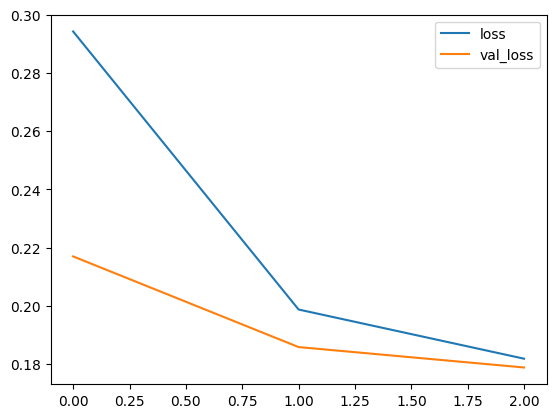

In [33]:
print("POOJASREE B\n212223040148")
metrics = pd.DataFrame(autoencoder.history.history)
metrics[['loss','val_loss']].plot()

In [34]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 9s 29ms/step


POOJASREE B
212223040148


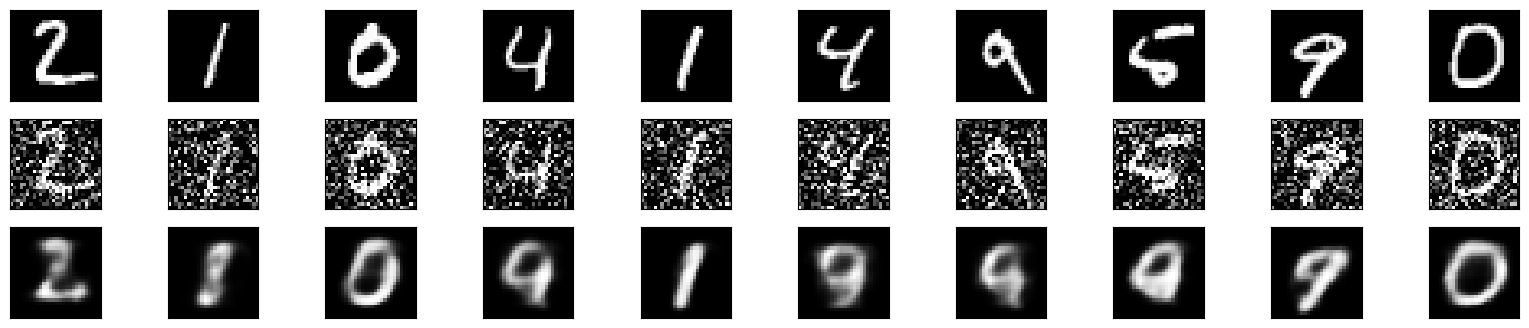

In [35]:
print("POOJASREE B\n212223040148")
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()